Saving archive.zip to archive.zip
Orders   : (99441, 8)
Payments : (103886, 5)
Customers: (99441, 5)

Final Monetization Dataset: (103886, 16)
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value                       customer_id  \
0                     8          99.33  0a8556ac6be836b46b3e89920d59291c   
1                     1          24.39  f2c7fc58a9de810828715166c672f10a   
2                     1          65.71  25b14b69de0b6e184ae6fe2755e478f9   
3                     8         107.78  7a5d8efaaa1081f800628c30d2b0728f   
4                     2         128.45  15fd

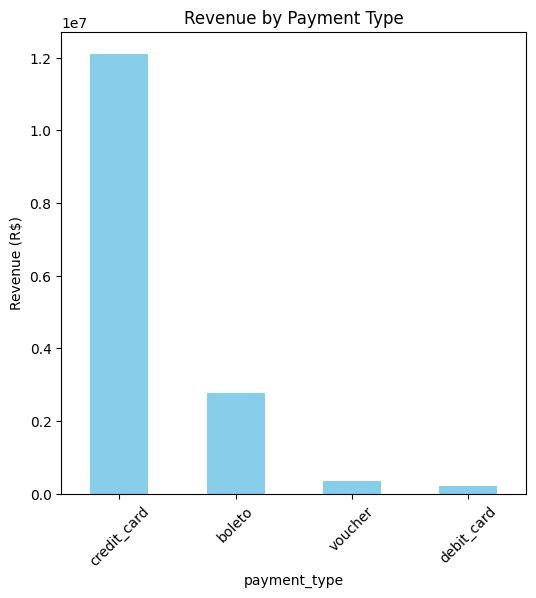

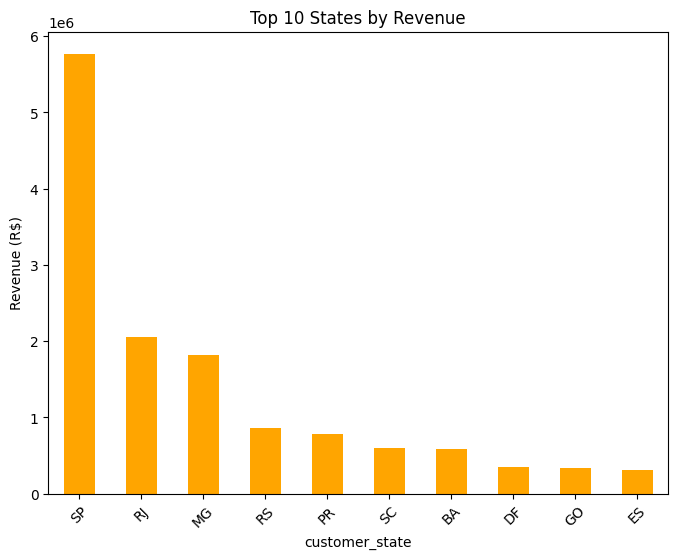

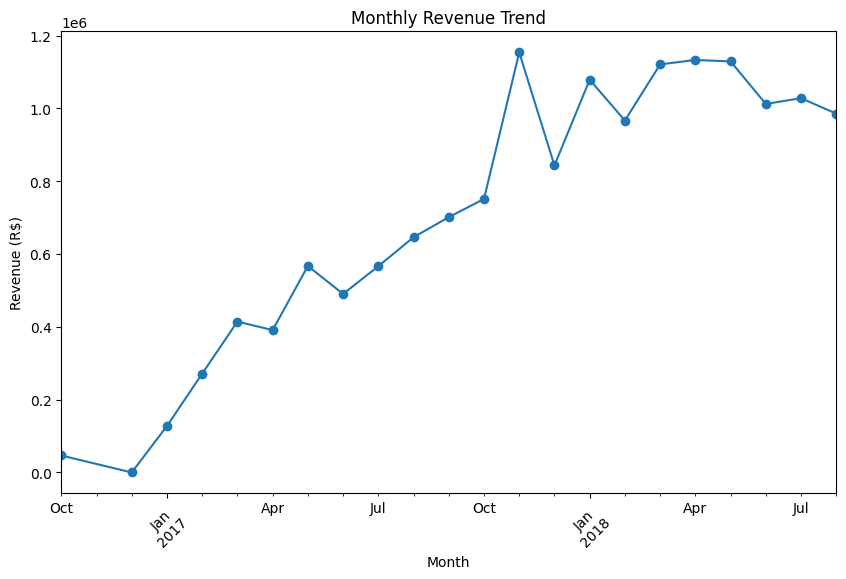

In [ ]:
# ===============================
# Step 1: Upload and Unzip Dataset
# ===============================
from google.colab import files
import zipfile

# Upload archive.zip
uploaded = files.upload()

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

# ===============================
# Step 2: Import Libraries
# ===============================
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# Step 3: Load Raw Data
# ===============================
orders = pd.read_csv("dataset/olist_orders_dataset.csv")
payments = pd.read_csv("dataset/olist_order_payments_dataset.csv")
customers = pd.read_csv("dataset/olist_customers_dataset.csv")

print("Orders   :", orders.shape)
print("Payments :", payments.shape)
print("Customers:", customers.shape)

# ===============================
# Step 4: Merge into Monetization Dataset
# ===============================
monetization = payments.merge(orders, on="order_id", how="inner") \
                       .merge(customers, on="customer_id", how="inner")

print("\nFinal Monetization Dataset:", monetization.shape)
print(monetization.head())

# ===============================
# Step 5: Data Cleaning
# Keep only delivered orders
# ===============================
monetization = monetization[monetization["order_status"] == "delivered"]
print("\nClean Monetization Dataset:", monetization.shape)

# ===============================
# Step 6: Revenue Metrics
# ===============================
total_revenue = monetization["payment_value"].sum()
aov = monetization.groupby("order_id")["payment_value"].sum().mean()
arpu = monetization.groupby("customer_unique_id")["payment_value"].sum().mean()

print("\n--- Revenue Metrics ---")
print(f"Total Revenue: R$ {total_revenue:,.2f}")
print(f"Average Order Value (AOV): R$ {aov:,.2f}")
print(f"Average Revenue Per User (ARPU): R$ {arpu:,.2f}")

# ===============================
# Step 7: Revenue by Payment Type
# ===============================
rev_payment = monetization.groupby("payment_type")["payment_value"].sum().sort_values(ascending=False)
print("\nRevenue by Payment Type:\n", rev_payment)

plt.figure(figsize=(6,6))
rev_payment.plot(kind="bar", color="skyblue")
plt.title("Revenue by Payment Type")
plt.ylabel("Revenue (R$)")
plt.xticks(rotation=45)
plt.show()

# ===============================
# Step 8: Revenue by Top 10 States
# ===============================
rev_states = monetization.groupby("customer_state")["payment_value"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
rev_states.plot(kind="bar", color="orange")
plt.title("Top 10 States by Revenue")
plt.ylabel("Revenue (R$)")
plt.xticks(rotation=45)
plt.show()

# ===============================
# Step 9: Monthly Revenue Trend
# ===============================
monetization["order_purchase_timestamp"] = pd.to_datetime(monetization["order_purchase_timestamp"])
monthly_rev = monetization.groupby(monetization["order_purchase_timestamp"].dt.to_period("M"))["payment_value"].sum()

plt.figure(figsize=(10,6))
monthly_rev.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue (R$)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Create year_month column
monetization["order_purchase_timestamp"] = pd.to_datetime(monetization["order_purchase_timestamp"])
monetization["year_month"] = monetization["order_purchase_timestamp"].dt.to_period("M")


/tmp/ipython-input-2597200269.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["payment_value"].sum() / x["customer_unique_id"].nunique())


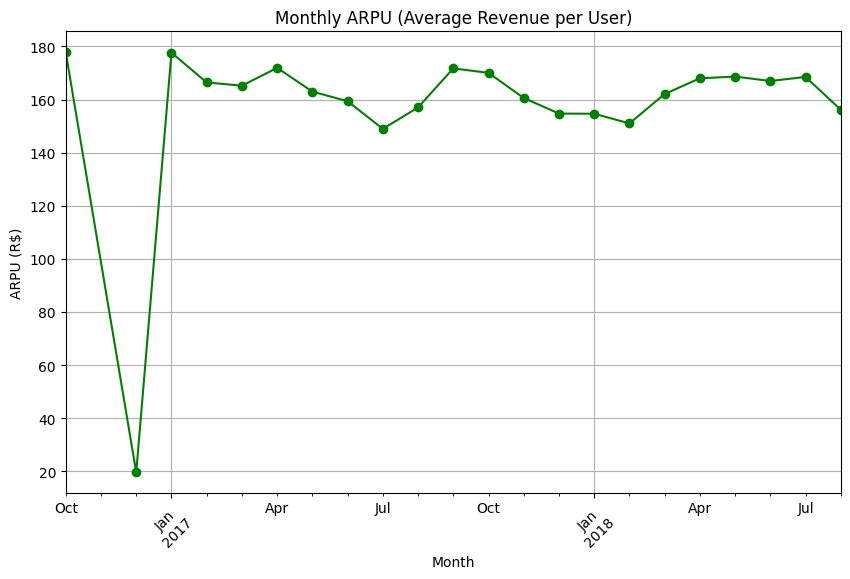

In [ ]:
# --- Monthly ARPU Trend ---
monthly_arpu = monetization.groupby("year_month") \
                           .apply(lambda x: x["payment_value"].sum() / x["customer_unique_id"].nunique())

plt.figure(figsize=(10,6))
monthly_arpu.plot(marker="o", color="green")
plt.title("Monthly ARPU (Average Revenue per User)")
plt.ylabel("ARPU (R$)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import os

# Create figures folder if not exists
os.makedirs("figures", exist_ok=True)

# --- Revenue by Payment Type ---
plt.figure(figsize=(7,5))
revenue_by_payment.plot(kind="bar", color="skyblue")
plt.title("Revenue by Payment Type")
plt.ylabel("Revenue (R$)")
plt.xlabel("Payment Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figures/revenue_by_payment.png")
plt.show()

# --- Monthly Revenue Trend ---
plt.figure(figsize=(10,6))
monthly_revenue.plot(marker="o", color="green")
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue (R$)")
plt.xlabel("Month")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("figures/monthly_revenue.png")
plt.show()

# --- Top 10 States by Revenue ---
plt.figure(figsize=(10,6))
top_states.plot(kind="bar", color="orange")
plt.title("Top 10 States by Revenue")
plt.ylabel("Revenue (R$)")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figures/top_states.png")
plt.show()

# --- Monthly ARPU Trend ---
plt.figure(figsize=(10,6))
monthly_arpu.plot(marker="o", color="red")
plt.title("Monthly ARPU Trend")
plt.ylabel("ARPU (R$)")
plt.xlabel("Month")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("figures/monthly_arpu.png")
plt.show()


NameError: name 'revenue_by_payment' is not defined

<Figure size 700x500 with 0 Axes>

/tmp/ipython-input-3260257892.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["payment_value"].sum()
/tmp/ipython-input-3260257892.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["payment_value"].sum() / x["customer_unique_id"].nunique())


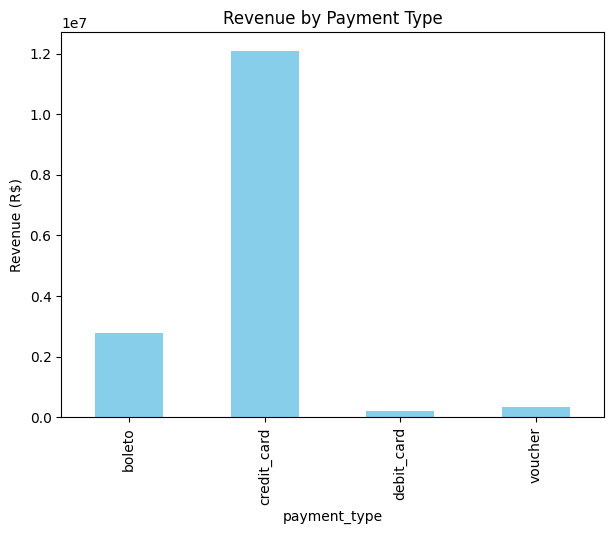

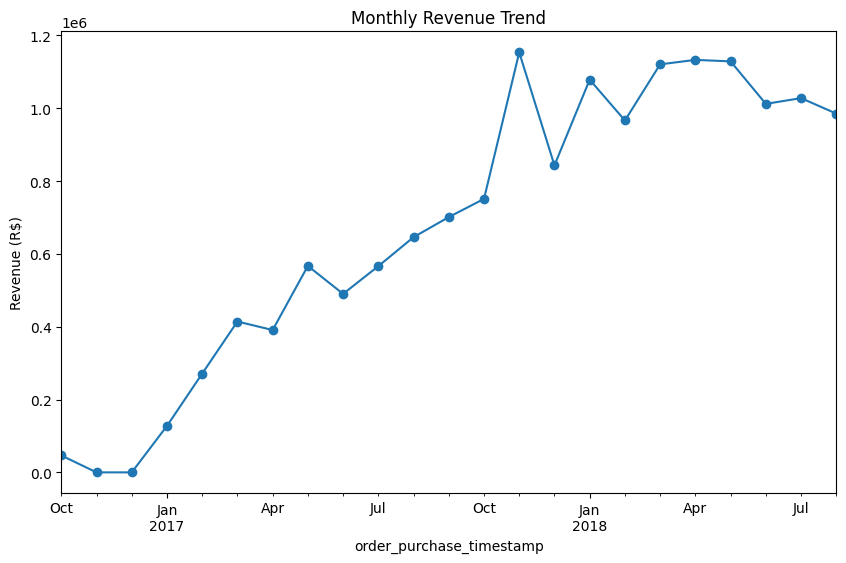

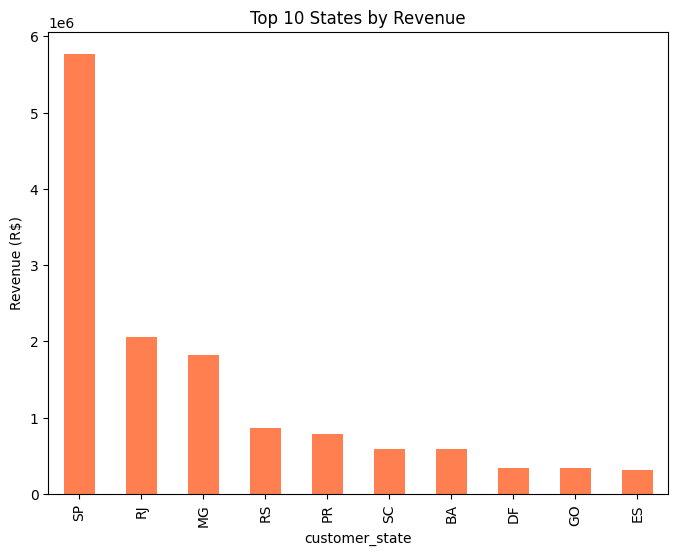

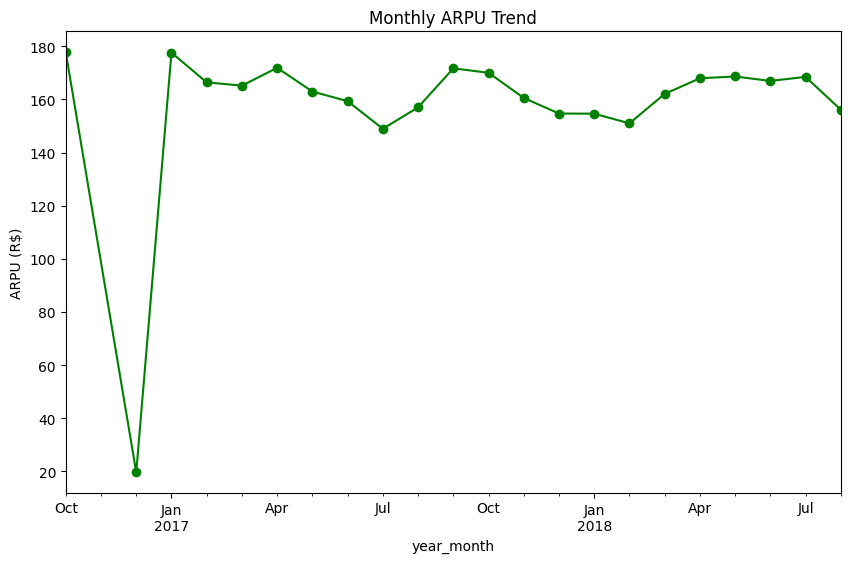

In [ ]:
import os
import matplotlib.pyplot as plt

# Ensure output folder exists
os.makedirs("figures", exist_ok=True)

# --- Recalculate Metrics ---
revenue_by_payment = monetization.groupby("payment_type")["payment_value"].sum()

monthly_revenue = monetization.set_index("order_purchase_timestamp") \
                              .resample("M")["payment_value"].sum()

top_states = monetization.groupby("customer_state")["payment_value"].sum().sort_values(ascending=False).head(10)

monthly_arpu = monetization.groupby("year_month") \
                           .apply(lambda x: x["payment_value"].sum() / x["customer_unique_id"].nunique())

# --- Revenue by Payment Type ---
plt.figure(figsize=(7,5))
revenue_by_payment.plot(kind="bar", color="skyblue")
plt.title("Revenue by Payment Type")
plt.ylabel("Revenue (R$)")
plt.savefig("figures/revenue_by_payment.png", bbox_inches="tight")
plt.show()

# --- Monthly Revenue Trend ---
plt.figure(figsize=(10,6))
monthly_revenue.plot(marker="o")
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue (R$)")
plt.savefig("figures/monthly_revenue.png", bbox_inches="tight")
plt.show()

# --- Top 10 States by Revenue ---
plt.figure(figsize=(8,6))
top_states.plot(kind="bar", color="coral")
plt.title("Top 10 States by Revenue")
plt.ylabel("Revenue (R$)")
plt.savefig("figures/top_states.png", bbox_inches="tight")
plt.show()

# --- Monthly ARPU Trend ---
plt.figure(figsize=(10,6))
monthly_arpu.plot(marker="o", color="green")
plt.title("Monthly ARPU Trend")
plt.ylabel("ARPU (R$)")
plt.savefig("figures/monthly_arpu.png", bbox_inches="tight")
plt.show()
